In [109]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict

In [110]:
# define State
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float


In [111]:
def calculate_bmi(state: BMIState) -> BMIState:
    
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight / (height ** 2)

    state['bmi'] = round(bmi, 2)

    return state


In [112]:
# define your graph
graph = StateGraph(BMIState)

In [113]:
# add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)

In [114]:
# add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', END)

In [115]:
# compile the graph
workflow = graph.compile()

In [116]:
initial_state = {'weight_kg': 80, 'height_m': 1.73}

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73}


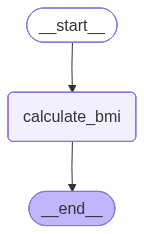

In [117]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())